In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import sparse
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Suppress warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
train_data = pd.read_parquet('/content/UNSW_NB15_training-set.parquet')
test_data = pd.read_parquet('/content/UNSW_NB15_testing-set.parquet')

In [ ]:
data = pd.concat([train_data,test_data])

In [ ]:
cols_cat = data.select_dtypes(['object', 'category']).columns
print(cols_cat)
# Numeric columns
cols_numeric = data._get_numeric_data().columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [ ]:
data['service'] = np.where(data['service'] == '-', 'None', data['service'])
data['service'].unique()

array(['None', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [ ]:
if '-' in data.values:
    print('- exists somewhere')
else:
    print('No - exists in the dataframe after cleaning the service column')

No - exists in the dataframe after cleaning the service column


In [ ]:
data.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])
cols_cat

Index(['proto', 'service', 'state'], dtype='object')

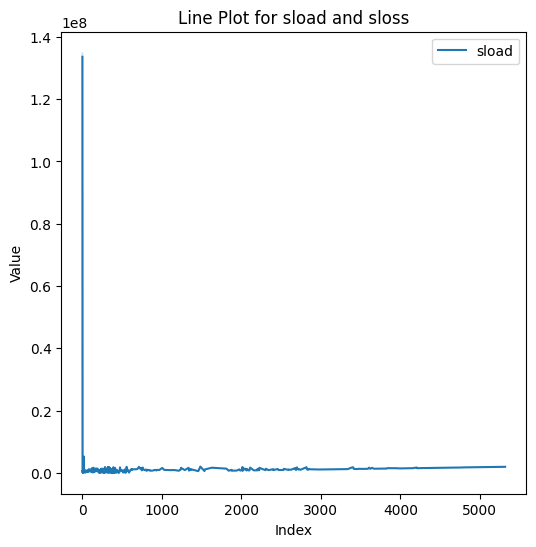

In [ ]:
plt.figure(figsize=(6,6))
sns.lineplot(data=data, x='sloss', y='sload', label='sload')

plt.title('Line Plot for sload and sloss')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

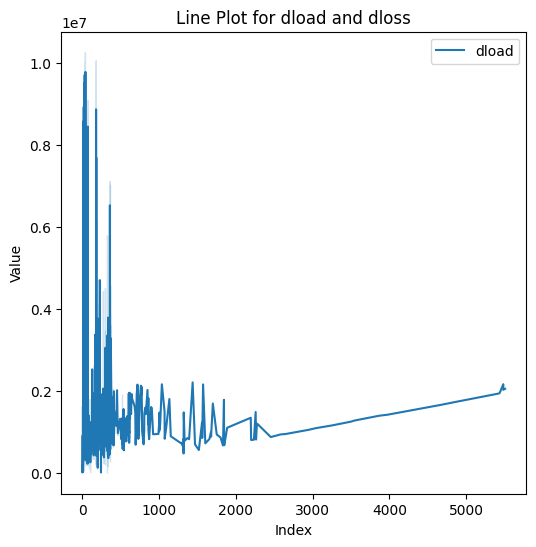

In [ ]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=data, x='dloss', y='dload', label='dload')
plt.title('Line Plot for dload and dloss')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
data_encoded = pd.get_dummies(data, columns=cols_cat)
data_encoded.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,24.295601,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0.649902,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,49.915001,15.432865,61.426933,1387.778320,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,1,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
data_encoded.shape

(257673, 189)

In [ ]:
cols_numeric = list(cols_numeric)
# Remove the y label
cols_numeric.remove('label')
# Convert all numbers to floating type
data_encoded[cols_numeric] = data_encoded[cols_numeric].astype('float')

In [ ]:
# Normalization of numeric columns
data_encoded[cols_numeric] = (data_encoded[cols_numeric] - np.min(data_encoded[cols_numeric])) / np.std(data_encoded[cols_numeric])
data_encoded.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.020333,0.044135,0.035719,0.001485,0.001176,0.000462,0.000076,0.003522,0.00000,0.000000,0.003510,0.007655,0.000615,0.003010,2.002085,0.454581,1.614909,2.004241,0.000000,0.000000,0.000000,0.208839,0.169264,0.0,0.0,0.122537,0.171482,0.000000,0.000000,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0.108783,0.102981,0.339329,0.004224,0.287375,0.000489,0.000045,0.208746,0.03050,0.316561,0.007211,0.014106,0.001253,0.353111,2.002085,1.036623,2.256357,2.004241,0.000000,0.000000,0.000000,0.252549,4.353636,0.0,0.0,0.122537,0.171482,0.000000,0.000000,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
from sklearn import model_selection, metrics
# Data, label split for models
X = data_encoded.drop('label', axis=1)
y = data_encoded['label']

In [ ]:
# Fit the model and check its score
def fit(model, X, y, cv):
    trained_model = model.fit(X, y) #trained_model
    acc = round(trained_model.score(X, y) * 100, 2)
    y_pred = model_selection.cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y, y_pred)*100, 2)
    precision = precision_score(y, y_pred, average='weighted')
    f1s = f1_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred, labels=trained_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=trained_model.classes_)
    disp.plot()
    plt.show()
    return y_pred, acc, acc_cv, precision, f1s, recall, trained_model


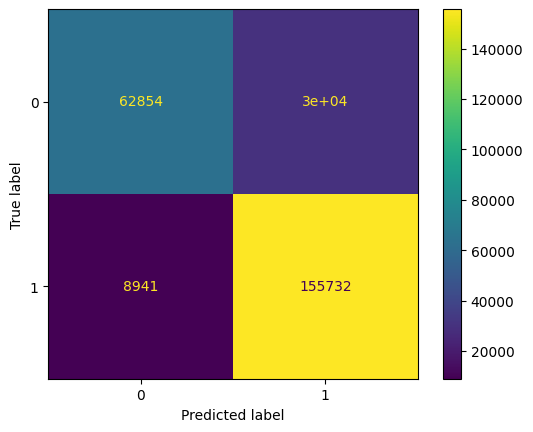

Accuracy: 86.24
Accuracy of cross validation: 84.83
Precision score: 0.8514058293706402
F1 Score: 0.8431362056965357
recall score: 0.8483077388783458
Execution time: 23.62405490875244


In [ ]:
from sklearn.linear_model import LogisticRegression


start_time = time.time()
pred_now, acc_lr, acc_cv_lr, prec_lr, f1_lr, recall_lr, lr = fit(LogisticRegression(C=0.1), X, y, 10)
lr_time = (time.time() - start_time)

print("Accuracy: %s" % acc_lr)
print("Accuracy of cross validation: %s" % acc_cv_lr)
print("Precision score: %s" %prec_lr)
print("F1 Score: %s" %f1_lr)
print("recall score: %s" % recall_lr)
print("Execution time: %s" % lr_time)


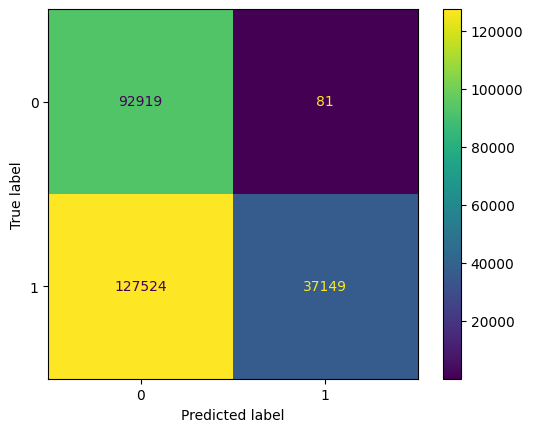

Accuracy: 50.5
Accuracy of CV: 50.48
Precision score: 0.7898196036661643
F1 Score: 0.4491614806235297
recall score: 0.5047793133157141
Execution time: 4.8779284954071045


In [ ]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
pred_now, acc_gnb, acc_cv_gnb, prec_gnb, f1_gnb, recall_gnb, gnb = fit(GaussianNB(), X, y, 5)
gnb_time = (time.time() - start_time)

print("Accuracy: %s" % acc_gnb)
print("Accuracy of CV: %s" % acc_cv_gnb)
print("Precision score: %s" %prec_gnb)
print("F1 Score: %s" %f1_gnb)
print("recall score: %s" % recall_gnb)
print("Execution time: %s" % gnb_time)


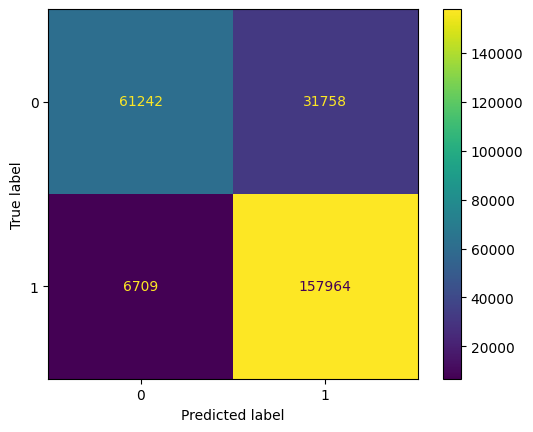

Accuracy: 86.11
Accuracy of CV: 85.07
Precision score: 0.8573884294896197
F1 Score: 0.8443729470390058
recall score: 0.8507138893093183
Execution time: 57.00230383872986


In [ ]:
# Support Vector Machine
from sklearn.svm import LinearSVC

start_time = time.time()
pred_now, acc_svc, acc_cv_svc, prec_svc, f1_svc, recall_svc, svc = fit(LinearSVC(), X, y, 10)
svc_time = (time.time() - start_time)

print("Accuracy: %s" % acc_svc)
print("Accuracy of CV: %s" % acc_cv_svc)
print("Precision score: %s" %prec_svc)
print("F1 Score: %s" %f1_svc)
print("recall score: %s" % recall_svc)
print("Execution time: %s" % svc_time)


In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()

pred_now, acc_gbt, acc_cv_gbt,prec_gbt, f1_gbt, recall_gbt, gbt = fit(GradientBoostingClassifier(), X, y, 10)

gbt_time = (time.time() - start_time)

print("Accuracy: %s" % acc_gbt)
print("Accuracy of CV: %s" % acc_cv_gbt)
print("Precision score: %s" %prec_gbt)
print("F1 Score: %s" %f1_gbt)
print("recall score: %s" % recall_gbt)
print("Execution time: %s" % gbt_time)


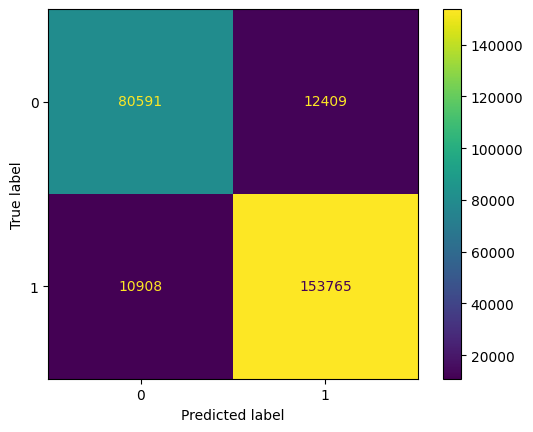

Accuracy: 99.02
Accuracy of CV: 90.95
Precision score: 0.9092498862575654
F1 Score: 0.90934651475285
recall score: 0.9095093393564712
Execution time: 14.806472063064575


In [ ]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
pred_now, acc_dt, acc_cv_dt,prec_dt, f1_dt, recall_dt, dt = fit(DecisionTreeClassifier(random_state = 1), X, y, 10)

dt_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dt)
print("Accuracy of CV: %s" % acc_cv_dt)
print("Precision score: %s" %prec_dt)
print("F1 Score: %s" %f1_dt)
print("recall score: %s" % recall_dt)
print("Execution time: %s" % dt_time)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # use 'softmax' for multi-class classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
nn_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
start_time = time.time()
#pred_now, acc_nn, acc_cv_nn,prec_nn, f1_nn, recall_nn, nn = fit(nn_model, X, y, 10)
trained_model = nn_model.fit(X, y)
acc_nn = round(trained_model.score(X, y) * 100, 2)
pred_nn = model_selection.cross_val_predict(trained_model, X, y, cv=10, n_jobs=-1)
acc_cv_nn = round(metrics.accuracy_score(y, pred_nn)*100, 2)
prec_nn = precision_score(y, pred_nn, average='weighted')
f1_nn = f1_score(y, pred_nn, average='weighted')
recall_nn = recall_score(y, pred_nn, average='weighted')
cm = confusion_matrix(y, pred_nn, labels=trained_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trained_model.classes_)
disp.plot()
plt.show()
nn_time = (time.time() - start_time)

print("Accuracy: %s" % acc_nn)
print("Accuracy of CV: %s" % acc_cv_nn)
print("Precision score: %s" %prec_nn)
print("F1 Score: %s" %f1_nn)
print("recall score: %s" % recall_nn)
print("Execution time: %s" % nn_time)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(y.unique()), random_state=42)

def fit_kmeans(X, y, n_clusters, cv):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    acc = round(accuracy_score(y, y_pred) * 100, 2)
    precision = precision_score(y, y_pred, average='weighted')
    f1s = f1_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    #acc_cv = round(accuracy_score(y, y_pred) * 100, 2)  # Cross-validation isn't typical for K-Means in this context
    return y_pred, acc, precision, f1s, recall, kmeans

start_time = time.time()
pred_now, acc_kmeans,prec_kmeans, f1_kmeans, recall_kmeans, kmeans = fit_kmeans(X, y, n_clusters=len(y.unique()), cv=10)
kmeans_time = (time.time() - start_time)

print("Accuracy: %s" % acc_kmeans)
print("Precision score: %s" %prec_kmeans)
print("F1 Score: %s" % f1_kmeans)
print("recall score: %s" % recall_kmeans)
print("Execution time: %s" % kmeans_time)

Accuracy: 36.12
Precision score: 0.7693784365577809
F1 Score: 0.19202607410213055
recall score: 0.3611981076791127
Execution time: 3.459484815597534


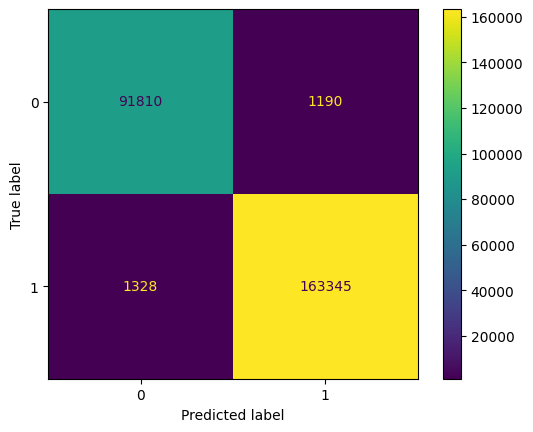

Accuracy: 99.02
Accuracy of cross validation: 99.02
Precision score: 0.9902316873532602
F1 Score: 0.9902294988094263
recall score: 0.9902279245400177
Execution time: 53.67510652542114


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def fit_rf(model, X, y, cv):
    trained_model = model.fit(X, y)  # Train the model
    acc = round(trained_model.score(X, y) * 100, 2)
    y_pred = trained_model.predict(X)
    acc_cv_rf = round(accuracy_score(y, y_pred) * 100, 2)
    precision = precision_score(y, y_pred, average='weighted')
    f1s = f1_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred, labels=trained_model.classes_)
    cm = confusion_matrix(y, y_pred, labels=trained_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=trained_model.classes_)
    disp.plot()
    plt.show()
    return y_pred, acc, acc_cv_rf,precision, f1s, recall, trained_model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
pred_now, acc_rf, acc_cv_rf,prec_rf, f1_rf, recall_rf, rf = fit_rf(rf_model, X, y, 10)
rf_time = (time.time() - start_time)

print("Accuracy: %s" % acc_rf)
print("Accuracy of cross validation: %s" % acc_cv_rf)
print("Precision score: %s" %prec_rf)
print("F1 Score: %s" %f1_rf)
print("recall score: %s" % recall_rf)
print("Execution time: %s" % rf_time)


In [ ]:
algorithm = ['Logisitc Regression','Gaussian Naive Bayes','Support Vector Machine','Gradient Boosting','Decision Tree Classifier', 'Neural Network', 'K-means', 'RandomForest']
compare = pd.DataFrame({'Algorithm' : algorithm, 'Accuracy':[acc_lr, acc_gnb, acc_svc, 81.99, acc_dt, 96.23, acc_kmeans, acc_rf]})

In [ ]:
compare = compare.sort_values(by='Accuracy', ascending = False)
compare = compare.reset_index(drop=True)
compare

,Algorithm,Accuracy
0,RandomForest,99.02
1,Decision Tree Classifier,99.02
2,Neural Network,96.23
3,Logisitc Regression,86.24
4,Support Vector Machine,86.11
5,Gradient Boosting,81.99
6,Gaussian Naive Bayes,50.50
7,K-means,36.12


from matplotlib import pyplot as plt
compare['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
compare.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare, x='Accuracy', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

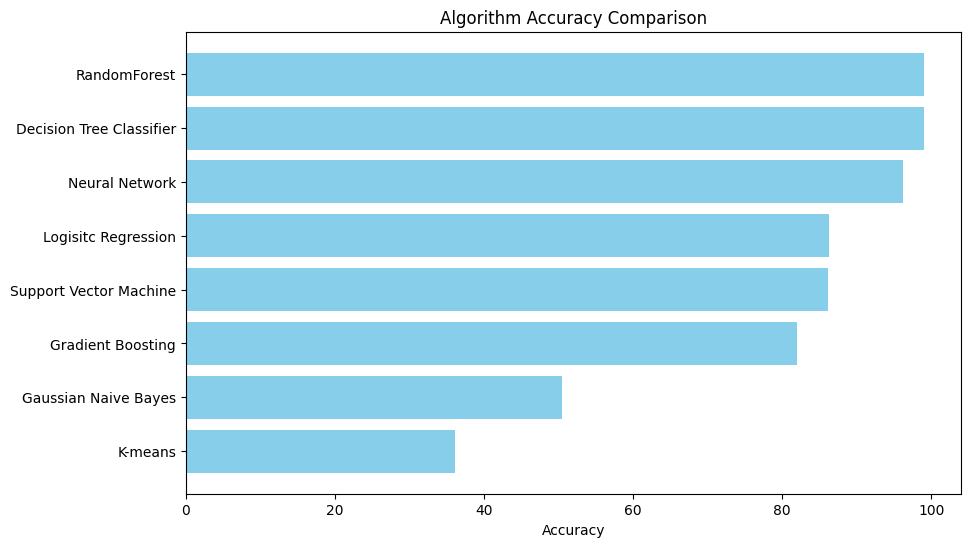

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(compare['Algorithm'], compare['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Algorithm Accuracy Comparison')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()

In [ ]:
algorithm = ['Logisitc Regression','Gaussian Naive Bayes','Support Vector Machine','Decision Tree Classifier', 'K-means', 'RandomForest']
compare = pd.DataFrame({'Algorithm' : algorithm, 'prec':[prec_lr, prec_gnb, prec_svc, prec_dt, prec_kmeans, prec_rf]})

compare = compare.sort_values(by='prec', ascending = False)
compare = compare.reset_index(drop=True)
compare

,Algorithm,prec
0,RandomForest,0.990232
1,Decision Tree Classifier,0.909250
2,Support Vector Machine,0.857388
3,Logisitc Regression,0.851406
4,Gaussian Naive Bayes,0.789820
5,K-means,0.769378


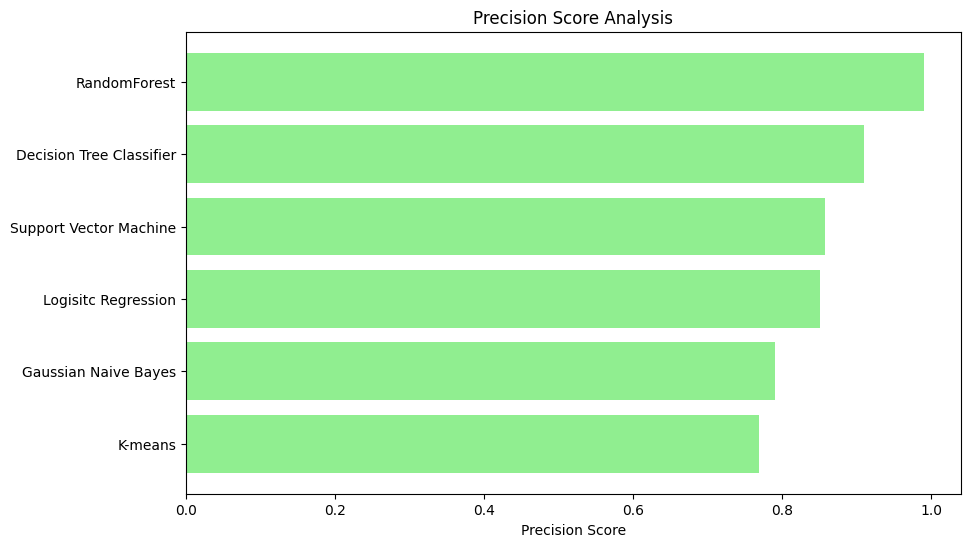

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(compare['Algorithm'], compare['prec'], color='lightgreen')
plt.xlabel('Precision Score')
plt.title('Precision Score Analysis')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()

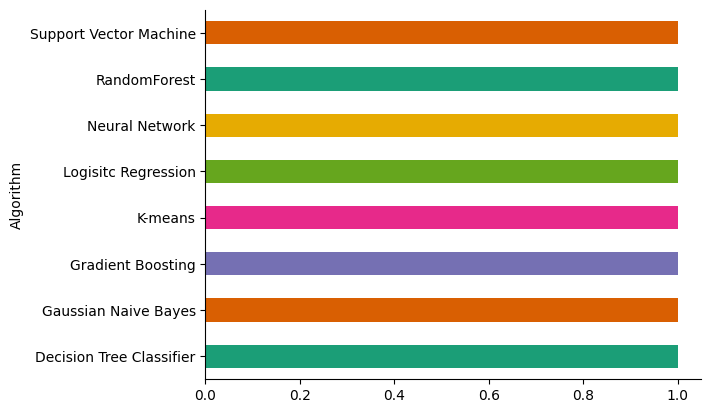

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
compare.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)